# Intro to Linear Programming with PuLP in Python

Original Question from https://coin-or.github.io/pulp/CaseStudies/a_blending_problem.html#problem-description

The_Whiskas_Problem:

MINIMIZE

0.008 BEEF + 0.013 CHICKEN + 0.01 GEL + 0.03 MUTTON + 0.02 RICE + 0.05 WHEAT

SUBJECT TO

PercentagesSum: BEEF + CHICKEN + GEL + MUTTON + RICE  + WHEAT = 100

ProteinRequirement: 0.2 BEEF + 0.1 Ingr_CHICKEN + 0.15 MUTTON + 0.04 WHEAT >= 8

FatRequirement: 0.1 BEEF + 0.08 Ingr_CHICKEN + 0.11 MUTTON + 0.01 RICE + 0.01 WHEAT >= 6

FibreRequirement: 0.005 BEEF + 0.001 CHICKEN + 0.003 MUTTON + 0.1 RICE + 0.15 WHEAT <= 2

SaltRequirement: 0.005 BEEF + 0.002 CHICKEN + 0.007 MUTTON  + 0.002 RICE + 0.008 WHEAT <= 0.4


Nonnegativity:  BEEF, CHICKEN, GEL, MUTTON, RICE, WHEAT  >= 0 


#   Steps for installing PuLP

In [1]:
import sys
!{sys.executable} -m pip install pulp 

In [2]:
import pulp

In [3]:
"""
The Full Whiskas Model Python Formulation for the PuLP Modeller

Authors: Antony Phillips, Dr Stuart Mitchell  2007
"""

# Import PuLP modeler functions
from pulp import *    # Here because of * we will not put `pulp' before each pulp command; e.g. instead of pulp.LpVariable, we simply write LpVariable. 

# Steps for Decision Variables. 

In [4]:
# Creates a list of the Ingredients
Ingredients = ['CHICKEN', 'BEEF', 'MUTTON', 'RICE', 'WHEAT', 'GEL']   # This gives the names for the indexes in the vector 

# A dictionary of the costs of each of the Ingredients is created. They give vector values. 
costs = {'CHICKEN': 0.013,
         'BEEF': 0.008, 
         'MUTTON': 0.03,
         'RICE': 0.02,
         'WHEAT': 0.05,
         'GEL': 0.02}

# A dictionary of the protein percent in each of the Ingredients is created
proteinPercent = {'CHICKEN': 0.100, 
                  'BEEF': 0.200, 
                  'MUTTON': 0.150, 
                  'RICE': 0.000, 
                  'WHEAT': 0.040, 
                  'GEL': 0.000}

# A dictionary of the fat percent in each of the Ingredients is created
fatPercent = {'CHICKEN': 0.080, 
              'BEEF': 0.100, 
              'MUTTON': 0.110, 
              'RICE': 0.010, 
              'WHEAT': 0.010, 
              'GEL': 0.000}

# A dictionary of the fibre percent in each of the Ingredients is created
fibrePercent = {'CHICKEN': 0.001, 
                'BEEF': 0.005, 
                'MUTTON': 0.003, 
                'RICE': 0.100, 
                'WHEAT': 0.150, 
                'GEL': 0.000}

# A dictionary of the salt percent in each of the Ingredients is created
saltPercent = {'CHICKEN': 0.002, 
               'BEEF': 0.005, 
               'MUTTON': 0.007, 
               'RICE': 0.002, 
               'WHEAT': 0.008, 
               'GEL': 0.000}

In [5]:
# Create the 'prob' variable to contain the problem data
prob = LpProblem("The_Whiskas_Problem", LpMinimize)

In [6]:
# A dictionary called 'ingredient_vars' is created to contain the referenced Variables
ingredient_vars = LpVariable.dicts("Ingr", Ingredients, 0)    # Here the last value '0' gives the lower bound for the variable. 
# Here "Ingr" is what appears when we print its name; e.g. Ingr_Beef. In the code, `ingredient_vars' is the name in the code.  
# We use the `dicts' command to use the previously given dictionary `Ingredient'.

# Objective function

In [7]:
# The objective function is added to 'prob' first
prob += lpSum([costs[i]*ingredient_vars[i] for i in Ingredients]), "Total Cost of Ingredients per can"   
# Here "Total Cost of Ingredients per can" gives an explanation comment. Do not forget to put the comma `.` before it. 

# Constraints

In [8]:
# The five constraints are added to 'prob'
prob += lpSum([ingredient_vars[i] for i in Ingredients]) == 100, "PercentagesSum"
prob += lpSum([proteinPercent[i] * ingredient_vars[i] for i in Ingredients]) >= 8.0, "ProteinRequirement"
prob += lpSum([fatPercent[i] * ingredient_vars[i] for i in Ingredients]) >= 6.0, "FatRequirement"
prob += lpSum([fibrePercent[i] * ingredient_vars[i] for i in Ingredients]) <= 2.0, "FibreRequirement"
prob += lpSum([saltPercent[i] * ingredient_vars[i] for i in Ingredients]) <= 0.4, "SaltRequirement"

Notice that we did not add the condition that the ingridients are >=0, as it was given in ingredient_vars = LpVariable.dicts("Ingr",Ingredients, 0)   by adding the `0`.

If we did not add `0` there, we can instead add the contraints in the code as 

`for i in Ingredients:
    prob += ingredient_vars[i] >= 0`

# Show the LP problem.

In [9]:
# You can write the problem to an .lp file
prob.writeLP("WhiskasModel.lp")

[Ingr_BEEF, Ingr_CHICKEN, Ingr_GEL, Ingr_MUTTON, Ingr_RICE, Ingr_WHEAT]

In [10]:
# Or you can directly display the problem here.

print(prob)

The_Whiskas_Problem:
MINIMIZE
0.008*Ingr_BEEF + 0.013*Ingr_CHICKEN + 0.02*Ingr_GEL + 0.03*Ingr_MUTTON + 0.02*Ingr_RICE + 0.05*Ingr_WHEAT + 0.0
SUBJECT TO
PercentagesSum: Ingr_BEEF + Ingr_CHICKEN + Ingr_GEL + Ingr_MUTTON + Ingr_RICE
 + Ingr_WHEAT = 100

ProteinRequirement: 0.2 Ingr_BEEF + 0.1 Ingr_CHICKEN + 0.15 Ingr_MUTTON
 + 0.04 Ingr_WHEAT >= 8

FatRequirement: 0.1 Ingr_BEEF + 0.08 Ingr_CHICKEN + 0.11 Ingr_MUTTON
 + 0.01 Ingr_RICE + 0.01 Ingr_WHEAT >= 6

FibreRequirement: 0.005 Ingr_BEEF + 0.001 Ingr_CHICKEN + 0.003 Ingr_MUTTON
 + 0.1 Ingr_RICE + 0.15 Ingr_WHEAT <= 2

SaltRequirement: 0.005 Ingr_BEEF + 0.002 Ingr_CHICKEN + 0.007 Ingr_MUTTON
 + 0.002 Ingr_RICE + 0.008 Ingr_WHEAT <= 0.4

VARIABLES
Ingr_BEEF Continuous
Ingr_CHICKEN Continuous
Ingr_GEL Continuous
Ingr_MUTTON Continuous
Ingr_RICE Continuous
Ingr_WHEAT Continuous



`Notice that the lower bound >=0 for the variable is not shown, as it is the default condition. If you had changed the lowerbound to something else, then it will show up here. `

# Solve the LP.

In [11]:
# The problem is solved using PuLP's choice of Solver
prob.solve()
# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])

Status: Optimal


# Get the 

In [12]:
# Each of the variables is printed with it's resolved optimum value
for a in prob.variables():
    print(a.name, "=", a.varValue)

Ingr_BEEF = 66.666667
Ingr_CHICKEN = 33.333333
Ingr_GEL = 0.0
Ingr_MUTTON = 0.0
Ingr_RICE = 0.0
Ingr_WHEAT = 0.0


In [13]:
print("Total Cost of Ingredients per can = ", value(prob.objective))

Total Cost of Ingredients per can =  0.966666665


Other way to write the final results. 

In [14]:
print(LpStatus[prob.status])
for i in prob.variables():
    print("Variable {0} = {1}".format(i.name, i.varValue))
print("Objective function z = {0}".format(value(prob.objective)))

Optimal
Variable Ingr_BEEF = 66.666667
Variable Ingr_CHICKEN = 33.333333
Variable Ingr_GEL = 0.0
Variable Ingr_MUTTON = 0.0
Variable Ingr_RICE = 0.0
Variable Ingr_WHEAT = 0.0
Objective function z = 0.966666665


In [15]:
import numpy as np
import matplotlib.pyplot as plt

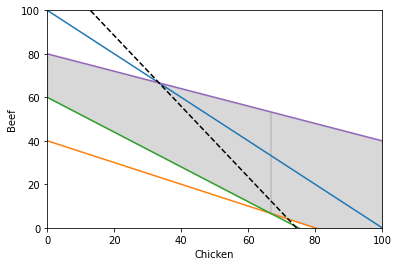

In [26]:
fig, ax = plt.subplots()
ax.set_xlabel('Chicken')
ax.set_ylabel('Beef')
ax.set_xlim((0, 100))
ax.set_ylim((0, 100))

Chicken = np.linspace(0, 100, 1001)
Beef = 100 - Chicken
ax.plot(Chicken, Beef, color='C0')

Beef_protein = (8 - 0.1 * Chicken) / 0.2
ax.plot(Chicken, Beef_protein, color='C1')

Beef_fat = (6 - 0.08 * Chicken) / 0.1
ax.plot(Chicken, Beef_fat, color='C2')

Beef_fibre = (2 - 0.001 * Chicken) / 0.005
ax.plot(Chicken, Beef_fibre, color='C3')

Beef_salt = (0.4 - 0.002 * Chicken) / 0.005
ax.plot(Chicken, Beef_salt, color='C4')

ax.fill_between(Chicken, Beef_fat, Beef_salt, where=(Beef_fat>Beef_protein), color='grey', alpha=0.3)
ax.fill_between(Chicken, Beef_protein, Beef_salt, where=(Beef_fat<Beef_protein), color='grey', alpha=0.3)

Beef_cost = (0.967 - 0.013 * Chicken) / 0.008
ax.plot(Chicken, Beef_cost, color='black', linestyle='dashed')